# Computing Classification Models for Target Labels

This notebook builds binary classification models for chosen target labels and is structured as follows:
____

**1. Import libraries**

All necessary analytical and visualization liberariers are importet. Furthermore, 'autoreload' is set to automatically
import a file again as soon as its code has changed.

**2. Set variables for algorithm input**

In this block, the strings may be changed to customize the classification model's output. On the one hand, the name of the file containing the data is assigned to a variable. On the other hand, the target label for buidling a classifier can be set. The value for random state should not be changed as 42 delivers the best results.

**3. Handle the dataset**

This section comprises several subsections:

*3.1 Load the data*:
In this section, the to be processed is loaded from the file system and the first five rows of data are shown.  


*3.2 Data Preprocessing*:
In the data preprocessing section, the features are assigned to the variable X and variable Y is the target label (the one that is going to be predicted). Furthermore, the categorical values are transformed into numerical ones and dummy variables for are introduced so that upcoming algorithms do not wrongly interpret data. The step is called standardization

*3.3 Split the data into train and test data*:
The data is split into four quantities, by convention with approprirate variable names:

|Variable|Description |
| ------------- |:-------------:|
 | X_train, y_train     | 70% of the data is used for training the model|
| X_test, y_test    | 30% of the data is used for testing the model regarding its performance|


**4. Implement machine learning models**

In this coding block, the machine learning models are implemented and is structured as follows:

*4.1 Import necessary libraris*: Libariers for building the models are imported

*4.2 Find the best hyperparamters for each classifier*: Grid search is method to tune the hyperparamters a
classifiers brings along. The values for the hyperparameters are stored as list. After that, the grid search is applied and the model with best paramters is extracted for further usage. 

*4.3 Build the classifiers and run them*: The models are built together with necessary values for upcoming visualization and an excerpt the result is provided.

**5. Implement deep learninng model**

The deep learning model is implemented by Tensorflow. The section is grouped as follows:

*5.1 Check the data and preprocess it*:
The data is again checked and necessary preprocessing steps like in section four are conducted. The approach is slightly different since the data needs to be kept as a pandas dataframe. Is necessary to transform the data into so-called "Tensors" which is comparable with an array, except holding a specific signature. Therefore, Tensorflow can easily process the data.

*5.2 Apply a deep neuronal network classifier*:
In this section, the neuronal network (mulitlayer peceptron) is being built. It consists of one input layer having three nodes (sex, age, income). There are three hidden layers wicht 20 neurons=nodes each. Lastly, the output layer encompasses two nodes since it is a binary classification problem. 20.000 steps for training the network are performed.

*5.3 Compute values for evaluation*:
The code block is responsbile for the computation of values that can be used for the evaluation of the network. The values are the same as mentionend in section four, namely array of predictions, confusion matrix, probabilities and accuracy.

**6. Evaluate and visualize the models' performances**

Section six is the place where the visualization of the models takes place. Based on that, it is possible to compare them among each and pick the best performing one.

*6.1 Styles of the plots*:
Sets globally the styles for the visual appearance of figures.

*6.2 Draw the confusion matrices*:
For each classifier (SVM, NB, DT, KNN, MLP) a confusion matrix in the two dimensional space (binary case) is drawn and exported to the file system.

*6.3 Compute error rates and area under roc*: 
This code segment calculates the error rates of each classifiers' predictions in order to draw the roc curve in the next step. Furthermore, the auc is computed which simplifies the evaluation of a classifier.

*6.4 Plot the roc curve*:
The code block shows how the roc curves of each applied classifier can be drawn. All curves a gathered in one chart for the best comparsion. At last, the chart is saved to the files system.

**7. Export the models**

*7.1 Save the ML models: Provides code for saving each ML model, namely NB, KNN, NB and DT.

*7.2 Save the DL model: Provides code for saving the DL model. A different code is necessary since the DL model bases on the tensorflow libary. Therefore, a different approach is required.

___

***HINT: If it is desired to compute am model for another target lable, the corresponding variables in section 2 must be adjusted and then, it is advisable, to restart the kernel. Otherwise, it may be possible that other variables still stored from prior usages and are mistakenly applied to sequences for building the new model.***

___

## 1. Import libariers

In [1]:
# import analysis libraries
import numpy as np
import pandas as pd

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# makes matplotlib executable in jupyter
%matplotlib inline

# set white backgroud to plots
sns.set_style("whitegrid", {'axes.grid' : False})

# autoreload librariers when they change
%load_ext autoreload
%autoreload 2

## 2. Set variables for algorithm input

In [2]:
# provide the data source --> must be an excel
dataset = '../Datasource/data_financeproducts.xlsx'

# set the target_label
target_label = 'Day-to-day money account'


# set the random state for the ML and DL models
# for obtaining the same results that I have, choose the following random states
# 'Life insurance': 100
# 'Housing saving': 42
# 'Day-to-day money account': 
random_state = 100

## 3. Handle the dataset

### 3.1 Load the data

In [5]:
# assign the data to a DataFrame
data = pd.read_excel(dataset)

In [6]:
# show the head of the data
data.head()

,Sex,Age,Net income,Amount of financial products,Stocks,Investment fonds,Bond issues,Savings certificate,Giro account,Day-to-day money account,Credit card,Fixed deposit account,Life insurance,Riester pension,Housing saving
0,male,28,1250-1499 €,3,no,no,no,no,yes,yes,yes,no,no,no,no
1,male,56,5000-5999 €,1,no,no,no,no,no,no,yes,no,no,no,no
2,male,28,1250-1499 €,3,no,no,no,no,yes,yes,yes,no,no,no,no
3,male,29,2000-2499 €,3,no,no,no,no,yes,no,yes,no,no,no,yes
4,male,29,2000-2499 €,2,no,no,no,no,yes,no,yes,no,no,no,no


### 3.2 Data preprocessing

In [7]:
# import librariers to preprocess data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# encode 'sex' --> female = 0, male = 1
le_x = LabelEncoder()
data['Sex_cat']= le_x.fit_transform(data['Sex'])

# encode 'net income' --> 16 categories, i.e. 16 numbers from 0 to 15
data['Income_cat']=le_x.fit_transform(data['Net income'])


In [8]:
data.head()

,Sex,Age,Net income,Amount of financial products,Stocks,Investment fonds,Bond issues,Savings certificate,Giro account,Day-to-day money account,Credit card,Fixed deposit account,Life insurance,Riester pension,Housing saving,Sex_cat,Income_cat
0,male,28,1250-1499 €,3,no,no,no,no,yes,yes,yes,no,no,no,no,1,1
1,male,56,5000-5999 €,1,no,no,no,no,no,no,yes,no,no,no,no,1,10
2,male,28,1250-1499 €,3,no,no,no,no,yes,yes,yes,no,no,no,no,1,1
3,male,29,2000-2499 €,3,no,no,no,no,yes,no,yes,no,no,no,yes,1,4
4,male,29,2000-2499 €,2,no,no,no,no,yes,no,yes,no,no,no,no,1,4


In [25]:
## map the numerical values to the categires

# find each unique value in columngs 'net income' and 'income_cat
income = data['Net income'].unique()
income_cat = data['Income_cat'].unique()

# build and show a dataframe with mapped integers to categories
encoding_overview = pd.DataFrame(data={'Net Income': income, 'Income_cat': income_cat})
encoding_overview.sort_values('Income_cat')

,Net Income,Income_cat
10,1000-1249 €,0
0,1250-1499 €,1
7,1500-1749 €,2
8,1750-1999 €,3
2,2000-2499 €,4
11,2500-2999 €,5
3,3000-3499 €,6
14,3500-3999 €,7
5,4000-4999 €,8
9,500-749 €,9


In [10]:
# select the input features for the classification algorithms: sex_cat, age, income_cat
X = data.iloc[:,[data.columns.get_loc('Sex_cat'),1,data.columns.get_loc('Income_cat')]].values
X

array([[ 1, 28,  1],
       [ 1, 56, 10],
       [ 1, 28,  1],
       [ 1, 29,  4],
       [ 1, 29,  4],
       [ 0, 32,  6],
       [ 0, 26,  1],
       [ 0, 22,  1],
       [ 1, 22, 12],
       [ 0, 49,  1],
       [ 1, 45,  8],
       [ 1, 30,  4],
       [ 0, 28, 15],
       [ 0, 31,  4],
       [ 0, 29,  4],
       [ 1, 28,  1],
       [ 0, 47,  1],
       [ 1, 27, 12],
       [ 0, 24,  2],
       [ 1, 47,  3],
       [ 1, 49,  6],
       [ 1, 24, 12],
       [ 0, 19,  9],
       [ 0, 22,  4],
       [ 0, 26, 15],
       [ 1, 36,  2],
       [ 0, 40,  9],
       [ 1, 49,  8],
       [ 1, 22,  0],
       [ 0, 23, 15],
       [ 0, 25,  3],
       [ 0, 27,  6],
       [ 0, 41,  5],
       [ 0, 26, 15],
       [ 1, 43,  4],
       [ 0, 34,  2],
       [ 0, 18, 12],
       [ 1, 42,  6],
       [ 1, 29,  2],
       [ 0, 22,  9],
       [ 0, 28,  5],
       [ 1, 66,  5],
       [ 0, 41,  1],
       [ 0, 23,  9],
       [ 0, 34,  4],
       [ 0, 39,  0],
       [ 0, 20,  9],
       [ 1, 2

In [11]:
# select the target attribute for the classification algorithms
y = data.loc[:,target_label].values

# encode 'target label' --> no = 0, yes = 1
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
print('y has now the values: ',y)

y has now the values:  [1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1]


In [12]:
# normalize the net income attribute to a corresponding 1 x 16 matrix (vector) (16 categories, i.e. 16 dummy variables)
onehotencoder = OneHotEncoder(categorical_features=[2])
X = onehotencoder.fit_transform(X).toarray()
print('Normalized X values:', X)

Normalized X values: [[ 0.  1.  0. ...  0.  1. 28.]
 [ 0.  0.  0. ...  0.  1. 56.]
 [ 0.  1.  0. ...  0.  1. 28.]
 ...
 [ 0.  0.  0. ...  0.  0. 28.]
 [ 0.  0.  0. ...  0.  1. 35.]
 [ 0.  0.  0. ...  0.  1. 32.]]


In [17]:
# get the columnnames
cn = encoding_overview.sort_values('Income_cat').values
cn_list=list(cn[:,0])
cn_list.append('Sex')
cn_list.append('Age')

In [18]:
# define a new dataframe for displaying the encoded input feature matrix
onehot_encoding = pd.DataFrame(X, columns=cn_list,dtype=np.int64)
onehot_encoding.head()

,1000-1249 €,1250-1499 €,1500-1749 €,1750-1999 €,2000-2499 €,2500-2999 €,3000-3499 €,3500-3999 €,4000-4999 €,500-749 €,5000-5999 €,6000-7499 €,750-999 €,7500-9999 €,above 10000 €,under 500 €,Sex,Age
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,56
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,29
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,29


### 3.3 Split the data into train and test data

In [27]:
# import library for data split
from sklearn.model_selection import train_test_split

# split the data assign to variables respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

# show the form of an instance at position 0 the x_test array
X_train[0]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1., 28.])

## 4. Implement machine learning models

### 4.1 Import necessary libraries

In [14]:
# import labriers for classification algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# import grid search library
from sklearn.model_selection import GridSearchCV

# import own helper functions
# the functions receive variables to compute predictions, confusion matrices, accuracies and probabilities
import helpers as hp

### 4.2 Find the best hyperparamters for each classifier

In [15]:
# define paramater grids for each classifier (naive_bayes has no hyperparamter to tune, so no grid search is possible)
svm_param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
kn_param_grid = { 'n_neighbors' : [2,3,4,5,6] , 'weights' : ['uniform', 'distance'], 
                 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size' : [30,40,50,60,70], 'p': [1,2]  }
tree_param_grid = { 'criterion': ['entropy', 'gini'], 'max_depth' : [3,4,5,6], 'min_samples_leaf': [1,2,3,4]}

# apply the grid search to find best parameters and get the objects of each classifier
svm = GridSearchCV(SVC(probability=True), svm_param_grid, refit=True)
kn = GridSearchCV(KNeighborsClassifier(), kn_param_grid, refit=True)
tree = GridSearchCV(DecisionTreeClassifier(), tree_param_grid, refit=True)
naive_bayes = GaussianNB()

### 4.3 Build the classifiers and run them

In [16]:
# define a class of a model with corresponding methods
class Model:
    
    # initilizes the clas with a name and an optimized classifier object from the grid search
    # passes the necessary data splits
    def __init__(self, name, classifier,X_train, y_train, X_test, y_test):
        self.name = name
        self.classifier = classifier
        self.predictions = []
        self.confusionMatrix = pd.DataFrame()
        self.accuracy= 0
        self.probabilities = []
    
    # compute the predictions for test data after training
    def addPrediction(self):
        self.predictions = hp.computePrediction(self.classifier, X_train, y_train, X_test)
    
    # build a confusion matrix
    def addConfusionMatrix(self):      
        self.confusionMatrix = hp.computeConfusionMatrix(y_test, self.predictions)
    
    # compute the accuracy
    def addAccuracy(self):
        self.accuracy=hp.computeAccuracy(y_test, self.predictions)
    
    # compute the pobrabilities for each predidiction which is necessary for the upcoming visualization section
    def addProbabilities(self):
        self.probabilities = hp.computeProbability(self.classifier, X_train, y_train, X_test)
        
            

In [17]:
# initilizes two arrays, one with the names of the classifiers, the other contains the objects
classifier_names = ['SVM', 'KNN', 'DT', 'NB']
classifier_objects = [svm, kn, tree, naive_bayes]

In [18]:
# build and run the models and compute all values
SVM = Model('SVM', svm, X_train, y_train, X_test, y_test)
KNN = Model('KNN', kn, X_train, y_train, X_test, y_test)
DT = Model('DT', tree, X_train, y_train, X_test, y_test)
NB = Model('NB', naive_bayes, X_train, y_train, X_test, y_test)


In [19]:
# create a list of machine learning models for iteration
classifiers = [SVM, KNN, DT, NB]

# iterate over all classifiers and add predictions, a confustion matrix, the accuracy score 
# and the probabilities of the predictioins
for clf in classifiers:
    clf.addPrediction()
    clf.addConfusionMatrix()
    clf.addAccuracy()
    clf.addProbabilities()

In [20]:
# define a dataframe
classifierResults=pd.DataFrame(index=classifier_names,
                               columns=['Accuracy', 'Predictions','Confusion Matrix', 'Probabilities'])

# print the results of the classifiers
for index,clf in enumerate(classifiers):
    classifierResults['Accuracy'][index] = clf.accuracy
    classifierResults['Predictions'][index]= clf.predictions
    classifierResults['Confusion Matrix'][index]=clf.confusionMatrix
    classifierResults['Probabilities'][index]=clf.probabilities
   
classifierResults

,Accuracy,Predictions,Confusion Matrix,Probabilities
SVM,0.641026,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",no yes no 24 2 yes 12 1,"[[0.6057495721908319, 0.3942504278091681], [0...."
KNN,0.589744,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",no yes no 22 4 yes 12 1,"[[1.0, 0.0], [0.5, 0.5], [0.5, 0.5], [0.25, 0...."
DT,0.615385,"[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",no yes no 21 5 yes 10 3,"[[0.66, 0.34], [0.66, 0.34], [0.48484848484848..."
NB,0.410256,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, ...",no yes no 5 21 yes 2 11,"[[2.1770668161067852e-06, 0.9999978229331853],..."


## 5. Implement deep learning model

In [21]:
# import the deep learning library
import tensorflow as tf

### 5.1 Check the data and preprocess it

In [22]:
# show the first five rows of the data
data.head()

,Sex,Age,Net income,Creditcard ownership,Amount of financial products,Stocks,Investment fonds,Bond issues,Savings certificate,Giro account,Day-to-day money account,Credit card,Fixed deposit account,Life insurance,Riester pension,Housing saving,Sex_cat,Income_cat
0,male,28,1250-1499 €,yes,3,no,no,no,no,yes,yes,yes,no,no,no,no,1,1
1,male,56,5000-5999 €,yes,1,no,no,no,no,no,no,yes,no,no,no,no,1,10
2,male,28,1250-1499 €,yes,3,no,no,no,no,yes,yes,yes,no,no,no,no,1,1
3,male,29,2000-2499 €,yes,3,no,no,no,no,yes,no,yes,no,no,no,yes,1,4
4,male,29,2000-2499 €,yes,2,no,no,no,no,yes,no,yes,no,no,no,no,1,4


In [23]:
# create input data
X_tf = pd.DataFrame(data.loc[:,['Sex','Age','Net income']], columns={'Sex': 'Sex', 'Age': 'Age', 'Net income': 'Net Income'})

# net income must be renamend to income since Tensorflow has problems with handling spaces between two strings
X_tf = X_tf.rename(columns={'Net income': 'Income'})

In [24]:
X_tf.head()

,Sex,Age,Income
0,male,28,1250-1499 €
1,male,56,5000-5999 €
2,male,28,1250-1499 €
3,male,29,2000-2499 €
4,male,29,2000-2499 €


In [25]:
# remove target attribute from the column names
input_features = data.columns.delete(data.columns.get_loc(target_label))

In [26]:
# drop features except target label from the dataframe
y_tf = data.drop(input_features, axis=1)
y

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [27]:
## encode categorical to binary values

# import the preprocessing libray
from sklearn.preprocessing import LabelEncoder

# encode 'no' and 'yes' to 0 respectively 1
labelencoder = LabelEncoder()
y_tf[target_label]=labelencoder.fit_transform(y_tf[target_label])

In [28]:
# split the dataframe objects into train and test data
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, y_tf, test_size=0.3, random_state=random_state)

In [29]:
# transform feature column into a tensor
sex = tf.feature_column.categorical_column_with_vocabulary_list('Sex', vocabulary_list=['Male', 'Female'] )

# apply embedding to make the column suitable for the DNNClassifier
embedded_group_sex = tf.feature_column.embedding_column(sex, dimension=2)

In [30]:
# transform feature column into a tensor
age = tf.feature_column.numeric_column('Age')

In [31]:
# transform feature column into a tensor
income = tf.feature_column.categorical_column_with_hash_bucket('Income', hash_bucket_size=16)

# apply embedding to make the column suitable for the DNNClassifier
embedded_group_income = tf.feature_column.embedding_column(income, dimension=16)

In [32]:
# define the feature column set --> 3 neurons for the input layer
feat_columns = [embedded_group_sex,age,embedded_group_income]

In [33]:
# define the input function
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train_tf, y=y_train_tf, batch_size=20, num_epochs=None, shuffle=True )

### 5.2 Apply a deep neuronal network classifier

In [34]:
# create the deep neuronal network multilayer perceptron model:
    # - 1 input layer with 3 neurons since the 3 features are fed in
    # - 3 hidden layer with 20 neurons for effective training
    # - 1 output player to get the predicted value

dnn = tf.estimator.DNNClassifier(hidden_units=[20,20,20], feature_columns=feat_columns,
                                 optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001), n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\OLIVER~1.GOE\\AppData\\Local\\Temp\\tmpege3wk86', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F511E8B1D0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [35]:
# train the network with 10.000 iterations
dnn.train(input_fn=input_func, steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\OLIVER~1.GOE\AppData\Local\Temp\tmpege3wk86\model.ckpt.
INFO:tensorflow:loss = 11.556062, step = 1
INFO:tensorflow:global_step/sec: 118.578
INFO:tensorflow:loss = 13.73493, step = 101 (0.847 sec)
INFO:tensorflow:global_step/sec: 204.329
INFO:tensorflow:loss = 13.583504, step = 201 (0.490 sec)
INFO:tensorflow:global_step/sec: 197.327
INFO:tensorflow:loss = 14.418535, step = 301 (0.508 sec)
INFO:tensorflow:global_step/sec: 211.35
INFO:tensorflow:loss = 13.66992, step = 401 (0.470 sec)
INFO:tensorflow:global_step/sec: 242.225
INFO:tensorflow:loss = 12.241097, step = 501 (0.413 sec)
INFO:tensorflow:global_step/sec: 205.958
INFO:tensorflow:loss = 14.126911, step = 601 (0.490 sec)
INFO:tensorflow:global_s

INFO:tensorflow:loss = 11.727829, step = 8001 (0.503 sec)
INFO:tensorflow:global_step/sec: 140.317
INFO:tensorflow:loss = 11.099498, step = 8101 (0.714 sec)
INFO:tensorflow:global_step/sec: 147.042
INFO:tensorflow:loss = 13.696408, step = 8201 (0.667 sec)
INFO:tensorflow:global_step/sec: 182.866
INFO:tensorflow:loss = 12.851131, step = 8301 (0.546 sec)
INFO:tensorflow:global_step/sec: 166.442
INFO:tensorflow:loss = 14.156767, step = 8401 (0.600 sec)
INFO:tensorflow:global_step/sec: 178.334
INFO:tensorflow:loss = 13.219123, step = 8501 (0.565 sec)
INFO:tensorflow:global_step/sec: 164.276
INFO:tensorflow:loss = 14.5984745, step = 8601 (0.611 sec)
INFO:tensorflow:global_step/sec: 204.773
INFO:tensorflow:loss = 12.103345, step = 8701 (0.481 sec)
INFO:tensorflow:global_step/sec: 206.127
INFO:tensorflow:loss = 13.210895, step = 8801 (0.485 sec)
INFO:tensorflow:global_step/sec: 176.536
INFO:tensorflow:loss = 13.438311, step = 8901 (0.566 sec)
INFO:tensorflow:global_step/sec: 156.846
INFO:tens

### 5.3 Compute values for evaluation

In [36]:
# define the prediction function
pred_func = tf.estimator.inputs.pandas_input_fn(x=X_test_tf, batch_size=len(X_test_tf), shuffle=False)

In [37]:
# define the evaluation function
eval_func = tf.estimator.inputs.pandas_input_fn(x=X_test_tf, y=y_test_tf, batch_size=len(X_test_tf), shuffle=False)

In [38]:
# get the predictions
dnn_predictions = dnn.predict(input_fn=pred_func)

In [39]:
# get the evaluation
dnn_eval = dnn.evaluate(input_fn=eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-30-23:19:15
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\OLIVER~1.GOE\AppData\Local\Temp\tmpege3wk86\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-05-30-23:19:17
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.6666667, accuracy_baseline = 0.6666666, auc = 0.50443786, auc_precision_recall = 0.3756639, average_loss = 0.6408699, global_step = 10000, label/mean = 0.33333334, loss = 24.993927, prediction/mean = 0.32980132


In [40]:
# get the class label for each instance
final_dnn_predictions = [pred['class_ids'][0] for pred in list(dnn_predictions)]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\OLIVER~1.GOE\AppData\Local\Temp\tmpege3wk86\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [41]:
# extract the probabilities from predictions
dnn_probabilities= dnn.predict(input_fn=pred_func)

In [42]:
# get the probabilities for each instance
final_dnn_probabilities = [prob['probabilities'] for prob in list(dnn_probabilities)]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\OLIVER~1.GOE\AppData\Local\Temp\tmpege3wk86\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [43]:
# build the model with the already computed values
MLP = Model('MLP', dnn, X_train_tf, X_test_tf, y_train_tf, y_test_tf )

# cast the probabilities to a numpy array for enabling to compute error rates
final_dnn_probabilities=np.array(final_dnn_probabilities)

# assign corresponding values to the model
MLP.predictions = final_dnn_predictions
MLP.probabilities = final_dnn_probabilities
MLP.accuracy = dnn_eval['accuracy']

# compute the confusion matrix
MLP.addConfusionMatrix()

# add MLP to the names and classifiers array for proper indexing in the visualization section
classifier_names.append('MLP')
classifiers.append(MLP)

In [44]:
# print the results of MLP for checking
print('Predictions: ', MLP.predictions)
print('Accuracy: ', MLP.accuracy)
print('Probabilities: ', MLP.probabilities)
print('Confusion Matrix: ', MLP.confusionMatrix)

Predictions:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy:  0.6666667
Probabilities:  [[0.6560132  0.3439868 ]
 [0.5760011  0.42399886]
 [0.63162965 0.36837035]
 [0.6831836  0.31681636]
 [0.62614816 0.3738518 ]
 [0.69480526 0.30519465]
 [0.703882   0.296118  ]
 [0.6421779  0.35782206]
 [0.68233275 0.31766725]
 [0.66209686 0.33790317]
 [0.6724483  0.3275517 ]
 [0.7005082  0.2994918 ]
 [0.6964394  0.30356064]
 [0.70091957 0.2990805 ]
 [0.58203316 0.41796687]
 [0.6815496  0.31845036]
 [0.67991114 0.3200889 ]
 [0.69144994 0.30855   ]
 [0.66664547 0.33335456]
 [0.7038807  0.29611924]
 [0.6508648  0.34913525]
 [0.685009   0.314991  ]
 [0.6385586  0.3614414 ]
 [0.6855483  0.31445166]
 [0.6246325  0.37536755]
 [0.6769144  0.32308564]
 [0.6888034  0.31119663]
 [0.6880585  0.3119415 ]
 [0.6607263  0.33927372]
 [0.5790201  0.42097992]
 [0.693158   0.30684206]
 [0.703882   0.296118  ]
 [0.69798505 0.30201495]
 [0.70

## 6. Evaluate and visualize the models' performances

### 6.1 Styles of the plots

In [45]:
# import library to modify style parameters
from matplotlib import rcParams

# font styles
fontsizes= {'title' : 20, 'axis': 15, 'ticks': 13}
fontweights= {'title' : 800, 'axis' : 600}

# define styles for the images
rcParams['axes.titlepad'] = 20

# define the output resolution 
output_dpi = 300

# define context and overall grid style
sns.set(style='white',context='paper', font_scale=2)

### 6.2 Draw the confusion matrices

In [46]:
# check the order of the classifiers in the dictionary
classifier_names

['SVM', 'KNN', 'DT', 'NB', 'MLP']

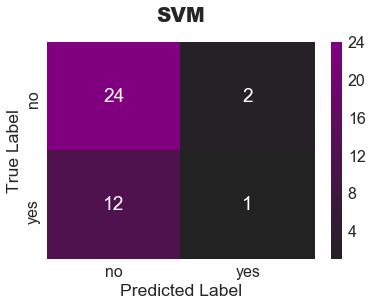

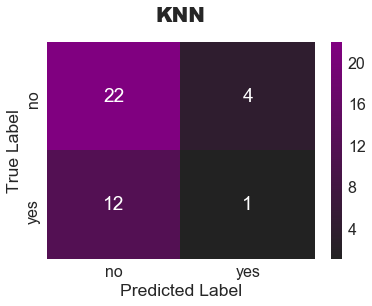

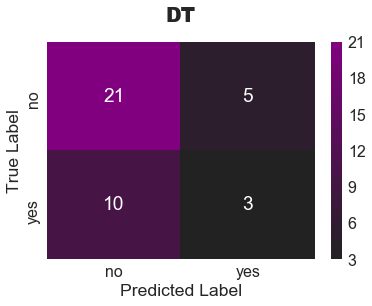

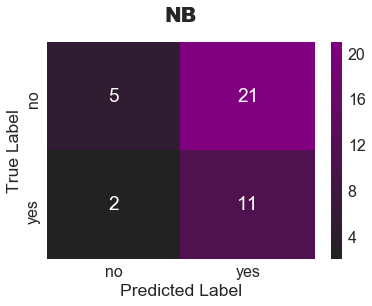

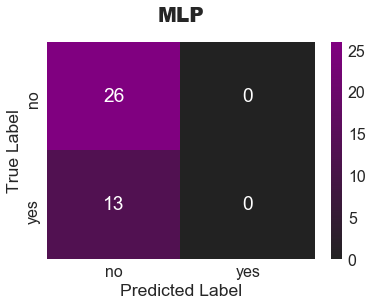

In [47]:
for clf in classifiers:
    hp.drawConfusionMatrix(clf.confusionMatrix, clf.name, styleDics=[fontsizes, fontweights])
    
    # save the image
    plt.savefig('{0} {1} Confusion Matrix.png'.format(target_label,clf.name), dpi=output_dpi, bbox_inches='tight')                                                                                             

### 6.3 Compute error rates and area under roc

In [48]:
# import roc and auc for performance comparison
from sklearn.metrics import roc_curve, auc

# initizile dictionaries to store the error rates
fprate = {}
tprate ={}
roc_auc = {}


# iterate over the classifiers
for clf in classifiers:
    
    # assign the rates to the respective classifier
    fprate[clf.name], tprate[clf.name], threshold = roc_curve(y_test, clf.probabilities[:,1])
    
    # assign the auc value to the respective classifier
    roc_auc[clf.name] = auc(fprate[clf.name], tprate[clf.name])

### 6.4 Plot the roc curve

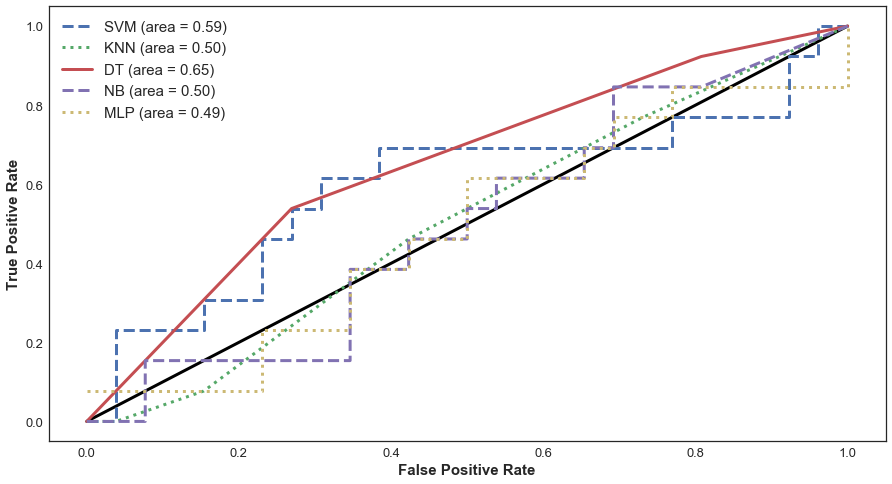

In [49]:
# draw a painting canvas and add an ax
fig,axes = plt.subplots(figsize=(15,8))

# set styles of the image
linewidth=3

# draw the baseline
axes.plot([0,1],[0,1], color='black', linewidth=linewidth)

# set styles for the curves
linestyles=['--', ':', '-', '--', ':']
colors=['b', 'g', 'r', 'brown', 'orange']


# plot the roc curve for each classifier
for index, linestyle in enumerate(linestyles):
    axes.plot(fprate[classifiers[index].name], tprate[classifiers[index].name], linestyle=linestyle, linewidth=linewidth,
          label=classifiers[index].name + ' (area = %0.2f)' % roc_auc[classifiers[index].name])
    
# add labels/description to the image    
#axes.set_title('ROC Curves for "Life insurance"', fontdict={'fontsize': fontsizes['title'], 'fontweight': fontweights['title']})
axes.set_ylabel('True Positive Rate', fontdict={'fontsize' : fontsizes['axis'], 'fontweight' : fontweights['axis']})
axes.set_xlabel('False Positive Rate', fontdict={'fontsize' : fontsizes['axis'], 'fontweight' : fontweights['axis']})
axes.tick_params(axis='both', labelsize=fontsizes['ticks'])

# add a legend
axes.legend(fontsize=fontsizes['axis'])

# save the image
plt.savefig('{} roc curves.png'.format(target_label), dpi=output_dpi)

## 7. Export the models

### 7.1 Save the ML models

In [50]:
# import library for exporting a model
from sklearn.externals import joblib

# iterate over the models except MLP because it has to be handled differently
counter =0
for clf in classifiers:
    
    # exclude MLP from the loop
    if counter < 4:
        # locally save the models
        joblib.dump(clf.classifier, '{} - {}.sav'.format(target_label, clf.name))
    
    # increment the counter
    counter += 1

### 7.2 Save the DL model

In [51]:
# define the input features with corresponding placeholders
feature_spec = {'Sex': tf.VarLenFeature(dtype=tf.string),
                'Age': tf.FixedLenFeature(shape=[],dtype=tf.int64),
                'Income': tf.FixedLenFeature(shape=[], dtype=tf.string)
               }


# define the filename
export_location = '{} - MLP'.format(target_label)

# define the receiver input function
serving_input_receiver_fn = tf.estimator.export.build_parsing_serving_input_receiver_fn(feature_spec)

# export the MLP model with a timestamp subfolder
MLP.classifier.export_savedmodel(export_location, serving_input_receiver_fn, as_text=False)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Signatures INCLUDED in export for Classify: ['serving_default', 'classification']
INFO:tensorflow:Signatures INCLUDED in export for Regress: ['regression']
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['predict']
INFO:tensorflow:Restoring parameters from C:\Users\OLIVER~1.GOE\AppData\Local\Temp\tmpege3wk86\model.ckpt-10000
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: b"Day-to-day money account - MLP\\temp-b'1527722384'\\saved_model.pb"


b'Day-to-day money account - MLP\\1527722384'